# PyEarthScience:  Python examples for Earth Scientists

## vector plots

### Using matplotlib

#### vector plot with
   - vectors on map plot
   - rectilinear grid (lat/lon)

In [4]:
from   mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
import matplotlib.pyplot as plt
from   netCDF4 import *
import numpy as np

Show plot in this notebook.

In [5]:
%matplotlib inline

In [6]:
#-- open netcdf file
nc = Dataset('/Users/k204045/NCL/general/data/new_data/rectilinear_grid_2D.nc', mode='r')

#-- read variable
u10 = nc.variables['u10'][0,:,:]
v10 = nc.variables['v10'][0,:,:]
lat = nc.variables['lat'][::-1]
lon = nc.variables['lon'][:]

u, lonsout = addcyclic(u10, lon)
v, lonsout = addcyclic(v10, lon)
print "lon[0]: ", lonsout[0], "lon[-1]: ", lonsout[-1]
print "lat[0]: ", lat[0], "lat[-1]: ", lat[-1]
print lonsout[:]
print lat[:]



lon[0]:  -180.0 lon[-1]:  180.0
lat[0]:  -88.572168514 lat[-1]:  88.572168514
[-180.    -178.125 -176.25  -174.375 -172.5   -170.625 -168.75  -166.875
 -165.    -163.125 -161.25  -159.375 -157.5   -155.625 -153.75  -151.875
 -150.    -148.125 -146.25  -144.375 -142.5   -140.625 -138.75  -136.875
 -135.    -133.125 -131.25  -129.375 -127.5   -125.625 -123.75  -121.875
 -120.    -118.125 -116.25  -114.375 -112.5   -110.625 -108.75  -106.875
 -105.    -103.125 -101.25   -99.375  -97.5    -95.625  -93.75   -91.875
  -90.     -88.125  -86.25   -84.375  -82.5    -80.625  -78.75   -76.875
  -75.     -73.125  -71.25   -69.375  -67.5    -65.625  -63.75   -61.875
  -60.     -58.125  -56.25   -54.375  -52.5    -50.625  -48.75   -46.875
  -45.     -43.125  -41.25   -39.375  -37.5    -35.625  -33.75   -31.875
  -30.     -28.125  -26.25   -24.375  -22.5    -20.625  -18.75   -16.875
  -15.     -13.125  -11.25    -9.375   -7.5     -5.625   -3.75    -1.875
    0.       1.875    3.75     5.625    7.5   

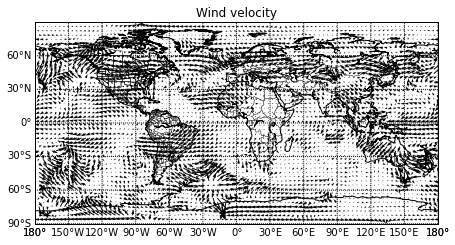

In [7]:
#-- create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax  = fig.add_axes([0.1,0.4,0.7,0.7])

#-- create map
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
              resolution='c',  llcrnrlon=-180.,urcrnrlon=180.)

#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()

#-- create and draw meridians and parallels grid lines
map.drawparallels(np.arange( -90., 90.,30.),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,30.),labels=[0,0,0,1],fontsize=10)

#-- convert latitude/longitude values to plot x/y values
x, y = map(*np.meshgrid(lon,lat))

#-- transform vector and coordinate data
veclon = u10.shape[1]/2                    #-- only every 2nd vector
veclat = u10.shape[0]/2                    #-- only every 2nd vector
uproj,vproj,xx,yy = map.transform_vector(u,v,lonsout,lat,veclon,veclat,returnxy=True,masked=True)

#-- create vector plot on map
vecplot = map.quiver(xx,yy,uproj,vproj,scale=600)
qk = plt.quiverkey(vecplot, 0.2, -0.2, 20, '20 m/s', labelpos='W')  #-- position and reference label

#-- add plot title
plt.title('Wind velocity')

plt.show()
#plt.savefig('plot_vector_matplotlib.png')